In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import load_model

import streamlit as st
from get_temp_csv import get_temp_csv




In [3]:
ticker = 'AAPL'
# using get_temp_csv tgo make a temp csv to get data and etc
get_temp_csv('AAPL')


In [4]:
df = pd.read_csv(r'..\\webapp\\temp_csv.csv')

In [5]:
df

,time,open,high,low,close,volume
0,2023-02-17 20:00:00,152.56,152.64,152.55,152.64,13206
1,2023-02-17 19:30:00,152.62,152.63,152.55,152.57,7159
2,2023-02-17 19:00:00,152.63,152.69,152.56,152.62,7923
3,2023-02-17 18:30:00,152.50,152.64,152.48,152.64,18157
4,2023-02-17 18:00:00,152.48,152.55,152.46,152.50,104746
...,...,...,...,...,...,...
667,2023-01-20 06:30:00,135.44,135.56,135.13,135.35,10249
668,2023-01-20 06:00:00,135.33,135.40,135.28,135.40,4345
669,2023-01-20 05:30:00,135.25,135.33,135.18,135.26,10111
670,2023-01-20 05:00:00,135.42,135.43,135.24,135.24,14940


In [7]:
def plot_chart(df):
    
    width = 0.9   # width of real body
    width2 = 0.05  # width of shadow

    fig, ax = plt.subplots(figsize=(16, 8))
    # find the rows that are bullish
    dfup = df[df.close >= df.open]
    # find the rows that are bearish
    dfdown = df[df.close < df.open]

    # plot the bullish candle stick
    ax.bar(dfup.index, dfup.close - dfup.open, width,
        bottom=dfup.open, edgecolor='g', color='green')
    ax.bar(dfup.index, dfup.high - dfup.close, width2,
        bottom=dfup.close, edgecolor='g', color='green')
    ax.bar(dfup.index, dfup.low - dfup.open, width2,
        bottom=dfup.open, edgecolor='g', color='green')

    # plot the bearish candle stick
    ax.bar(dfdown.index, dfdown.close - dfdown.open, width,
        bottom=dfdown.open, edgecolor='r', color='red')
    ax.bar(dfdown.index, dfdown.high - dfdown.open, width2,
        bottom=dfdown.open, edgecolor='r', color='red')
    ax.bar(dfdown.index, dfdown.low - dfdown.close, width2,
        bottom=dfdown.close, edgecolor='r', color='red')
    ax.grid(color='gray')

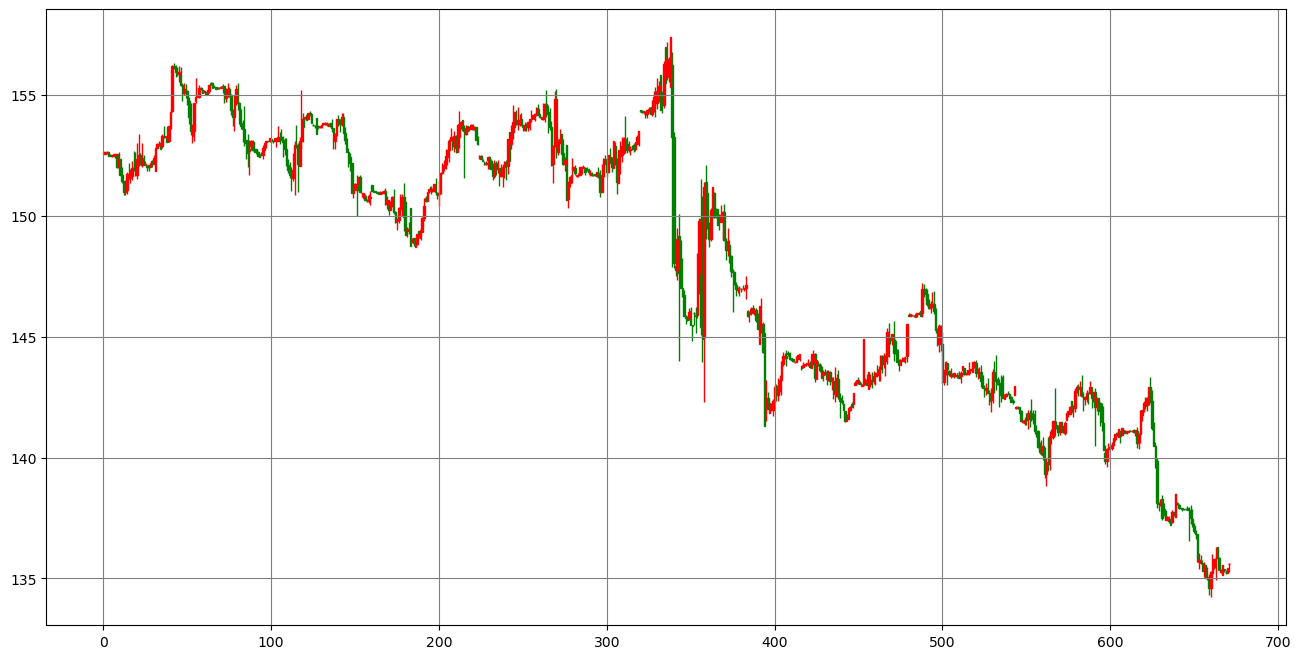

In [8]:
plot_chart(df)